In [121]:
# Import Dependencies
%matplotlib inline

# Import the required libraries
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#Load the csv file as pandas dataframe
aust = pd.read_csv('/Users/fareenkhan/Downloads/weatherAUS.csv')


In [90]:
aust.shape

(142193, 24)

In [91]:
aust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [92]:
aust.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [93]:
#check for null values
aust.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [94]:
#Excluding Evaporation, Sunshine, Cloud9am and Cloud3pm since these columns have less than 3/5th of the data.
aust = aust.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)

In [95]:
#Drop RISK_MM can leak some info to our model, thus giving incorrect accuracy.
aust = aust.drop(columns=['RISK_MM'], axis=1)

In [96]:
#Drop Location, since we're predicting for Australia only. Also, drop Date.
aust = aust.drop(columns=['Location','Date'], axis=1)

In [97]:
aust = aust.dropna(how='any')
aust.shape

(112925, 17)

In [98]:
#Remove outliers
from scipy import stats
z = np.abs(stats.zscore(aust._get_numeric_data()))
print(z)
aust= aust[(z < 3).all(axis=1)]
print(aust.shape)

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]
(107868, 17)


In [99]:
aust.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.731850,0.060468,0.172115,0.161147,0.158273,-0.229948,0.022874,-0.457125,-0.470082,0.901086,0.707920
MaxTemp,0.731850,1.000000,-0.159865,0.079976,0.007844,0.030035,-0.517233,-0.496843,-0.349210,-0.447246,0.883554,0.984985
Rainfall,0.060468,-0.159865,1.000000,0.129801,0.070536,0.057727,0.293940,0.302529,-0.170271,-0.103090,-0.060406,-0.164667
WindGustSpeed,0.172115,0.079976,0.129801,1.000000,0.556157,0.660688,-0.199390,-0.040855,-0.415008,-0.369009,0.142709,0.044740
WindSpeed9am,0.161147,0.007844,0.070536,0.556157,1.000000,0.458910,-0.233385,-0.031693,-0.171868,-0.122176,0.100454,-0.003064
WindSpeed3pm,0.158273,0.030035,0.057727,0.660688,0.458910,1.000000,-0.095201,0.051447,-0.261738,-0.221616,0.144433,0.007330
Humidity9am,-0.229948,-0.517233,0.293940,-0.199390,-0.233385,-0.095201,1.000000,0.675005,0.130623,0.183283,-0.468138,-0.511147
Humidity3pm,0.022874,-0.496843,0.302529,-0.040855,-0.031693,0.051447,0.675005,1.000000,-0.020589,0.062738,-0.198194,-0.546416
Pressure9am,-0.457125,-0.349210,-0.170271,-0.415008,-0.171868,-0.261738,0.130623,-0.020589,1.000000,0.959700,-0.430996,-0.309537
Pressure3pm,-0.470082,-0.447246,-0.103090,-0.369009,-0.122176,-0.221616,0.183283,0.062738,0.959700,1.000000,-0.482068,-0.416783


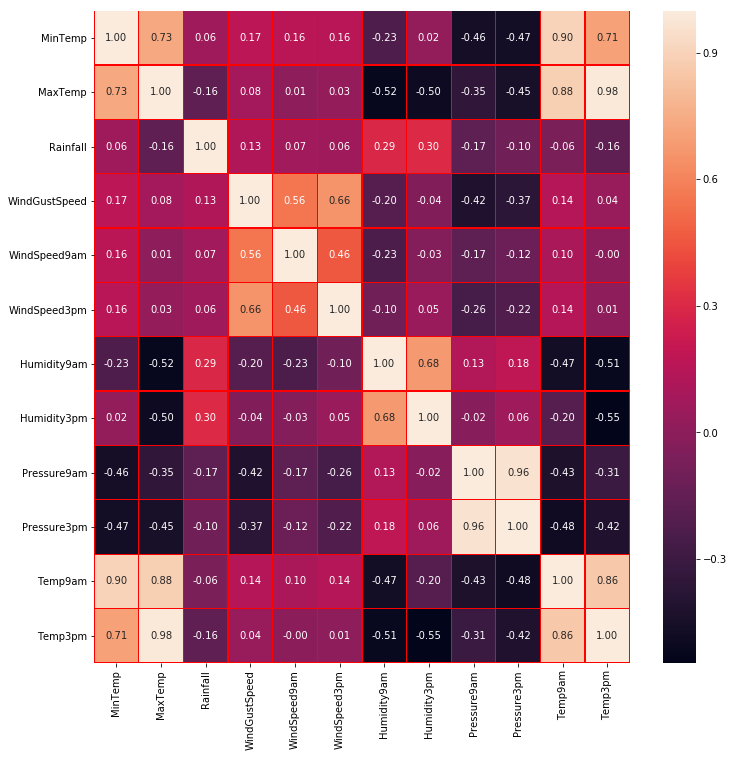

In [100]:
#heatmap
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(aust.corr(), annot=True, linewidths=0.3,linecolor="red", fmt= '.2f',ax=ax)
plt.show()

In [101]:

aust['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
aust['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

#See unique values and convert them to int using pd.getDummies()
categorical = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical:
    print(np.unique(aust[col]))


['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [102]:
# transform the categorical columns
aust = pd.get_dummies(aust, columns=categorical)
aust.iloc[4:9]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


In [103]:
#Splitting into corpus and target variable
X = aust.drop(['RainTomorrow'], axis=1)
Y = aust.RainTomorrow
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [104]:
#Feature Scaling
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.518717,0.464198,0.021429,0.506849,0.486486,0.523810,0.674157,0.22,0.268409,0.309353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.358289,0.518519,0.000000,0.506849,0.054054,0.476190,0.370787,0.25,0.337292,0.326139,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.505348,0.533333,0.000000,0.534247,0.459459,0.571429,0.303371,0.30,0.266033,0.347722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.406417,0.590123,0.000000,0.232877,0.243243,0.166667,0.382022,0.16,0.503563,0.446043,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.25, random_state=43)

In [107]:
#Univariate Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
UnivariateFeatureSelection = SelectKBest(chi2, k=3).fit(x_train, y_train)

In [108]:
# Creating a dict to visualize which features were selected with the highest score
diccionario = {key:value for (key, value) in zip(UnivariateFeatureSelection.scores_, x_train.columns)}
sorted(diccionario.items())

[(9.346438758178645e-05, 'WindDir3pm_WSW'),
 (0.057508280077933044, 'WindGustDir_SSW'),
 (0.5491480835742185, 'WindGustDir_S'),
 (1.644261208289181, 'WindDir9am_NE'),
 (2.114090592973732, 'WindDir9am_SW'),
 (3.656975059574621, 'WindDir3pm_SSW'),
 (3.838775158362119, 'WindDir3pm_S'),
 (6.156323751694643, 'Temp9am'),
 (6.942073981653642, 'WindDir9am_WSW'),
 (9.112469629713301, 'WindDir9am_SSW'),
 (11.721232806465931, 'WindGustDir_WSW'),
 (13.07458706335279, 'WindGustDir_SW'),
 (15.580441008840964, 'WindGustDir_NNE'),
 (21.96825657405175, 'WindDir3pm_NE'),
 (22.223030079450425, 'MinTemp'),
 (27.069273106806257, 'WindDir9am_WNW'),
 (28.83211263036208, 'WindGustDir_SSE'),
 (36.02265371488197, 'WindSpeed3pm'),
 (36.19432455117668, 'WindGustDir_NE'),
 (38.8422845338672, 'WindDir3pm_NNE'),
 (41.663948591280274, 'WindDir9am_S'),
 (44.24195114347911, 'WindSpeed9am'),
 (46.44511612307248, 'WindDir3pm_SSE'),
 (48.21866048375081, 'WindDir3pm_W'),
 (49.7064505789486, 'WindDir3pm_SW'),
 (51.923448547

In [109]:
# Using the 'UnivariateFeatureSelection' based on 'SelectKBest' function,
# let's extract the best features from the original dataset

x_train_k_best = UnivariateFeatureSelection.transform(x_train)
x_test_k_best = UnivariateFeatureSelection.transform(x_test)

In [110]:
print("Shape of original data: ", x_train.shape)
print("Shape of corpus with best features: ", x_train_k_best.shape)

Shape of original data:  (80901, 61)
Shape of corpus with best features:  (80901, 3)


In [111]:
#Let's get hold of the important features as assign them as X
aust = aust[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]
X = aust[['Humidity3pm']] # let's use only one feature Humidity3pm
y = aust[['RainTomorrow']]

In [112]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,np.ravel(y_train))
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8367263692661401
Time taken : 0.0681309700012207


In [113]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_rf = RandomForestClassifier(n_estimators=200,max_leaf_nodes=1000, max_depth=4,random_state=0)
clf_rf.fit(X_train,np.ravel(y_train))
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)


Accuracy : 0.8353543219490488
Time taken : 4.89124321937561


In [114]:
from sklearn.svm import SVC

In [115]:
svc = SVC()

In [116]:
svc.fit(X_train, np.ravel(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
y_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

In [118]:
print(accuracy_score(y_train,y_train_pred))

0.8361206907207575


In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier().fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy :',acc)

Accuracy : 0.7952164642625382


In [120]:
#All models give an accuracy score between 83% to 84 % except for KNeighborsClassifier. Considering the accuracy as well as the computation time, DecisionTreeClassifier is best.